Dataset: https://cocodataset.org/#download

In [1]:
import pandas as pd
from pickle import dump
import json
import string
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from numpy import array
import re
import numpy as np
import os
from tensorflow.keras.models import load_model
from tqdm.notebook import tqdm
from nltk.translate.bleu_score import corpus_bleu
from PIL import Image
import matplotlib.pyplot as plt
import visualkeras
from PIL import ImageFont

In [ ]:
# Reading The train json file
with open('C:/Users/admin/Desktop/ImageCaptioning/captions_train2017.json') as json_data:
    train_capitons_unordered = json.load(json_data)

In [ ]:
# Printing the keys of the initial train json file which contains a dictionary
#I only need annotations here
print(train_capitons_unordered.keys())

In [ ]:
#An example record from annotations
#I only need image_id and caption here
print(train_capitons_unordered['annotations'][3])

In [ ]:
#total lenght of annotations which says one image has more than one caption as there are 118287 images but 591753 captions
print(len(train_capitons_unordered['annotations']))

In [ ]:
#Create a new train caption dictionary to be used
#'image_id's will be th keys and their value will be a list containing all the corresponding captions for the image
caption_data = {}

for i in range(0,len(train_capitons_unordered['annotations'])):
    if (train_capitons_unordered['annotations'][i]['image_id'] not in caption_data.keys()):
        caption_data[train_capitons_unordered['annotations'][i]['image_id']] = [train_capitons_unordered['annotations'][i]['caption']]
    else:
        caption_data[train_capitons_unordered['annotations'][i]['image_id']].append(train_capitons_unordered['annotations'][i]['caption'])

In [ ]:
#lenght of the new dictionary containing captions for each image which shows the above code worked correctly
len(caption_data)

In [ ]:
#An example image caption list corresponding to image_id 203564
print(caption_data[203564])

In [ ]:
#Save new train caption list to a json file
# Serializing json
json_object_train = json.dumps(caption_data, indent=4)
 
# Writing to new_train_captions.json
with open("new_train_captions.json", "w") as outfile:
    outfile.write(json_object_train)

-----------------------------------------------------------------------

In [ ]:
# Reading The val json file
with open('C:/Users/admin/Desktop/ImageCaptioning/captions_val2017.json') as json_data_val:
    val_capitons_unordered = json.load(json_data_val)

In [ ]:
# Printing the keys of the initial val json file which contains a dictionary
#I only need annotations here
print(val_capitons_unordered.keys())

In [ ]:
#An example record from annotations
#I only need image_id and caption here
print(val_capitons_unordered['annotations'][3])

In [ ]:
#total lenght of annotations which says one image has more than one caption as there are 5000 images but 25014 captions
print(len(val_capitons_unordered['annotations']))

In [ ]:
#Create a new val caption dictionary to be used
#'image_id's will be th keys and their value will be a list containing all the corresponding captions for the image
caption_data_val = {}

for i in range(0,len(val_capitons_unordered['annotations'])):
    if (val_capitons_unordered['annotations'][i]['image_id'] not in caption_data_val.keys()):
        caption_data_val[val_capitons_unordered['annotations'][i]['image_id']] = [val_capitons_unordered['annotations'][i]['caption']]
    else:
        caption_data_val[val_capitons_unordered['annotations'][i]['image_id']].append(val_capitons_unordered['annotations'][i]['caption'])

In [ ]:
#lenght of the new dictionary containing captions for each image which shows the above code worked correctly
len(caption_data_val)

In [ ]:
#An example image caption list corresponding to image_id 285
print(caption_data_val[285])

In [ ]:
#Save new val caption list to a json file
# Serializing json
json_object_val = json.dumps(caption_data_val, indent=4)
 
# Writing to new_train_captions.json
with open("new_val_captions.json", "w") as outfile:
    outfile.write(json_object_val)

-----------------------------------------------------------------------

In [15]:
# extract features from each photo in the directory
# "directory" example --> 'C:/Users/admin/Desktop/ImageCaptioning/train2017', pklFileName --> file name for the files to be saved
def extract_features(directory,pklFileName):
     # load the model
        model = VGG16()
        # re-structure the model
        model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
        # summarize
        print(model.summary())
        
        # extract features from each photo
        features = dict()
        
        for name in listdir(directory):
            # load an image from file
            filename = directory + '/' + name
            image = load_img(filename, target_size=(224, 224))
            # convert the image pixels to a numpy array
            image = img_to_array(image)
            # reshape data for the model
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            # prepare the image for the VGG model
            image = preprocess_input(image)
            # get features
            feature = model.predict(image, verbose=0)
            # get image id
            image_id = name.split('.')[0]
            #Delete the unnecessary zeros from the file names
            x = ''
            for i in range(0,len(image_id)):
                if(image_id[i] != '0'):
                    x = i
                    break
            image_id = image_id[int(x):]
            # store feature
            features[image_id] = feature
            print('>%s' % name)
        
        # save to file
        dump(features, open(f'{pklFileName}.pkl', 'wb'))
        
        return features

In [ ]:
#Train Images Directory Part 1
train_images_directory = 'C:/Users/admin/Desktop/ImageCaptioning/train2017'
#Extract features from first part of train images and save them to a file named "train_features.pkl"
extract_features(train_images_directory,"train_features")

In [ ]:
#Train Images Directory Part 2
train_images_directory2 = 'C:/Users/admin/Desktop/ImageCaptioning/train2017_2'
#Extract features from second part of train images and save them to a file named "train_features_2.pkl"
extract_features(train_images_directory2,"train_features_2")

In [ ]:
#Train Images Directory Part 3
train_images_directory3 = 'C:/Users/admin/Desktop/ImageCaptioning/train2017_3'
extract_features(train_images_directory3,"train_features_3")

In [ ]:
#Val Images Directory 
val_images_directory = 'C:/Users/admin/Desktop/ImageCaptioning/val2017'
#Extract features from third part of train images and save them to a file named "train_features_2.pkl"
extract_features(val_images_directory,"val_features")

In [ ]:
#Read all parts of the extracted image files
train_features = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/train_features.pkl')
train_features_2 = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/train_features_2.pkl')
train_features_3 = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/train_features_3.pkl')

In [ ]:
#Merge feature dictionaries
train_features.update(train_features_2)
train_features.update(train_features_3)

In [ ]:
#Save all features together as a single file
dump(train_features, open('train_features_all.pkl', 'wb'))

-----------------------------------------------------------------------

In [ ]:
#Read train and validation captions
with open('C:/Users/admin/Desktop/ImageCaptioning/new_train_captions.json') as json_data_test:
    t_captions = json.load(json_data_test)
    
with open('C:/Users/admin/Desktop/ImageCaptioning/new_val_captions.json') as json_data_val:
    v_captions = json.load(json_data_val)

In [ ]:
#Merge all captions and save them to a file
t_captions.update(v_captions)

dump(t_captions, open('all_captions.pkl', 'wb'))

In [ ]:
#Read train image names and features
train = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/train_images_names.pkl')
features = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/train_features_all.pkl')

In [3]:
#Read all captions
allCaptions = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/all_captions.pkl')

In [4]:
#Function to preprocess captions
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # for loop is used to take all captions one by one
            caption = captions[i]
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            #remove punctuation
            caption = re.sub(r'[^\w\s]','',caption)
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [5]:
#Preprocessed the loaded captions
clean(allCaptions)

In [6]:
#An example of a cleaned caption
allCaptions['139']

['startseq woman stands in the dining area at the table endseq',
 'startseq room with chairs table and woman in it endseq',
 'startseq woman standing in kitchen by window endseq',
 'startseq person standing at table in room endseq',
 'startseq living area with television and table endseq']

In [7]:
all_captions = []
for key in allCaptions:
    for caption in allCaptions[key]:
        all_captions.append(caption)

In [8]:
len(all_captions)

616767

In [10]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocabulary_size = len(tokenizer.word_index) + 1

#vocabulary size
vocabulary_size

29591

In [11]:
#Get the maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)

#See the max_lenght
max_length

49

In [12]:
# create data generator to get data in batch 
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocabulary_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocabulary_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

In [ ]:
#MODEL THAT WILL PREDICT THE CAPTION OF A GIVEN IMAGE

# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.3)(inputs1)
fe2 = Dense(128, activation='relu')(fe1)
fe3 = Dropout(0.2)(fe2)
fe4 = Dense(128, activation='relu')(fe3)

# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocabulary_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.2)(se1)
se3 = LSTM(128,return_sequences=True)(se2)
se4 = Dropout(0.2)(se3)
se5 = LSTM(128)(se4)
se6 = Dropout(0.2)(se5)

# decoder model
decoder1 = concatenate([fe4, se6])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocabulary_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# plot the model
#plot_model(model, show_shapes=True)
print(model.summary())

In [ ]:
# train the model
epochs = 3
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, allCaptions, features, tokenizer, max_length, vocabulary_size, batch_size)
    # fit for one epoch
    model_history = model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

In [ ]:
#Save the trained model
model.save('Models/final_model.h5')

-----------------------------------------------------------------------

In [13]:
#Load the trained model
model = load_model('Models/final_model.h5')
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 49)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 49, 256)      7575296     ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 dropout_2 (Dropout)            (None, 49, 256)      0           ['embedding[0][0]']              
                                                                                              

In [14]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [15]:
#Generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

In [16]:
#TEST THE MODEL - Gıven an image, extract features and predict caption
def extract_features(filename):
    # load the model
	model = VGG16()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

def generate_caption(image_name):
    photo = extract_features(image_name)
    # predict the caption
    y_pred = predict_caption(model, photo, tokenizer, max_length)
    img = Image.open(image_name)
    plt.imshow(img, aspect='auto')
    plt.title(f'PREDICTED: {y_pred}')

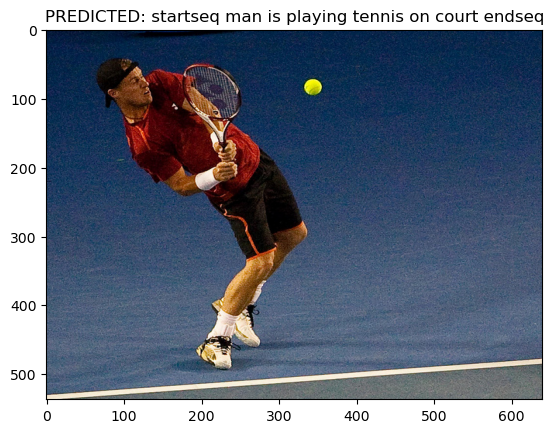

In [25]:
#Example 1
generate_caption("TestPics/344475.jpg")

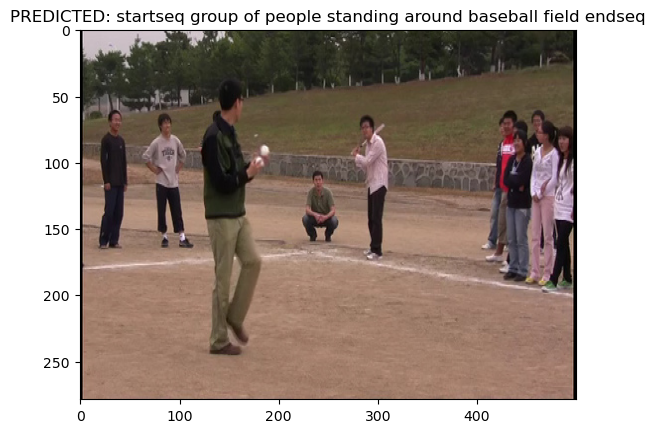

In [19]:
#Example 2
generate_caption("TestPics/139491.jpg")

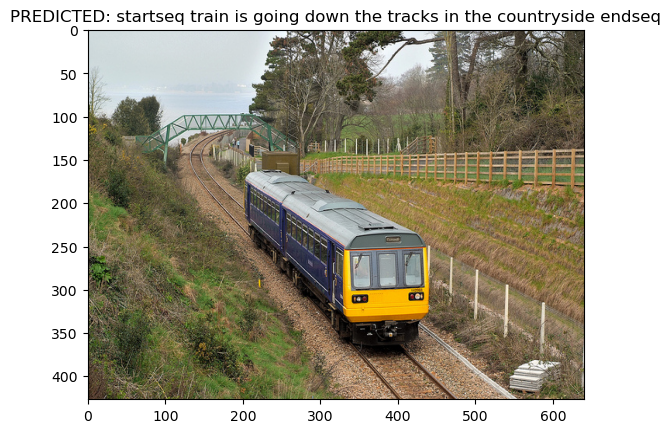

In [16]:
#Example 3
generate_caption("TestPics/108.jpg")

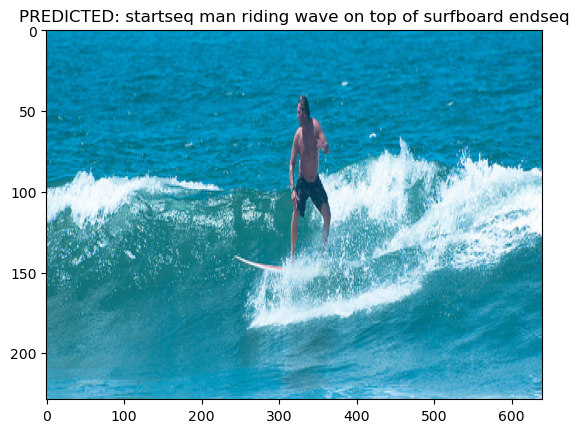

In [21]:
#Example 4
generate_caption("TestPics/1653.jpg")

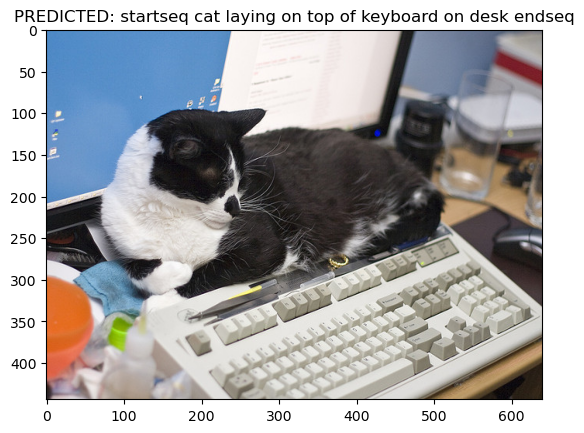

In [21]:
#Example 5
generate_caption("TestPics/12291.jpg")

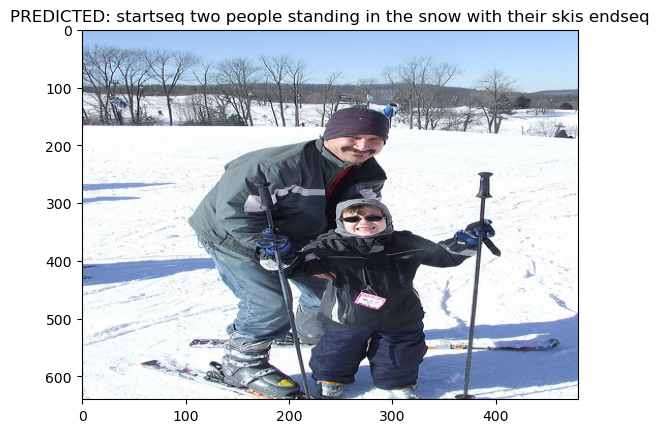

In [22]:
#Example 6
generate_caption("TestPics/35892.jpg")

-----------------------------------------------------------------------

In [16]:
#Read validation names and features
test = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/val_images_names.pkl')
features_val = pd.read_pickle('C:/Users/admin/Desktop/ImageCaptioning/val_features.pkl')

In [17]:
#Performance of the model --> BLEU-1 and BLEU-2
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = allCaptions[key]
    # predict the caption for image
    y_pred = predict_caption(model, features_val[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

  0%|          | 0/5000 [00:00<?, ?it/s]

BLEU-1: 0.641619
BLEU-2: 0.410600
BLEU-3: 0.271764
BLEU-4: 0.173217


In [19]:
#Save actual results
dump(actual, open('actual.pkl', 'wb'))

In [20]:
#Save predicted results
dump(predicted, open('predicted.pkl', 'wb'))

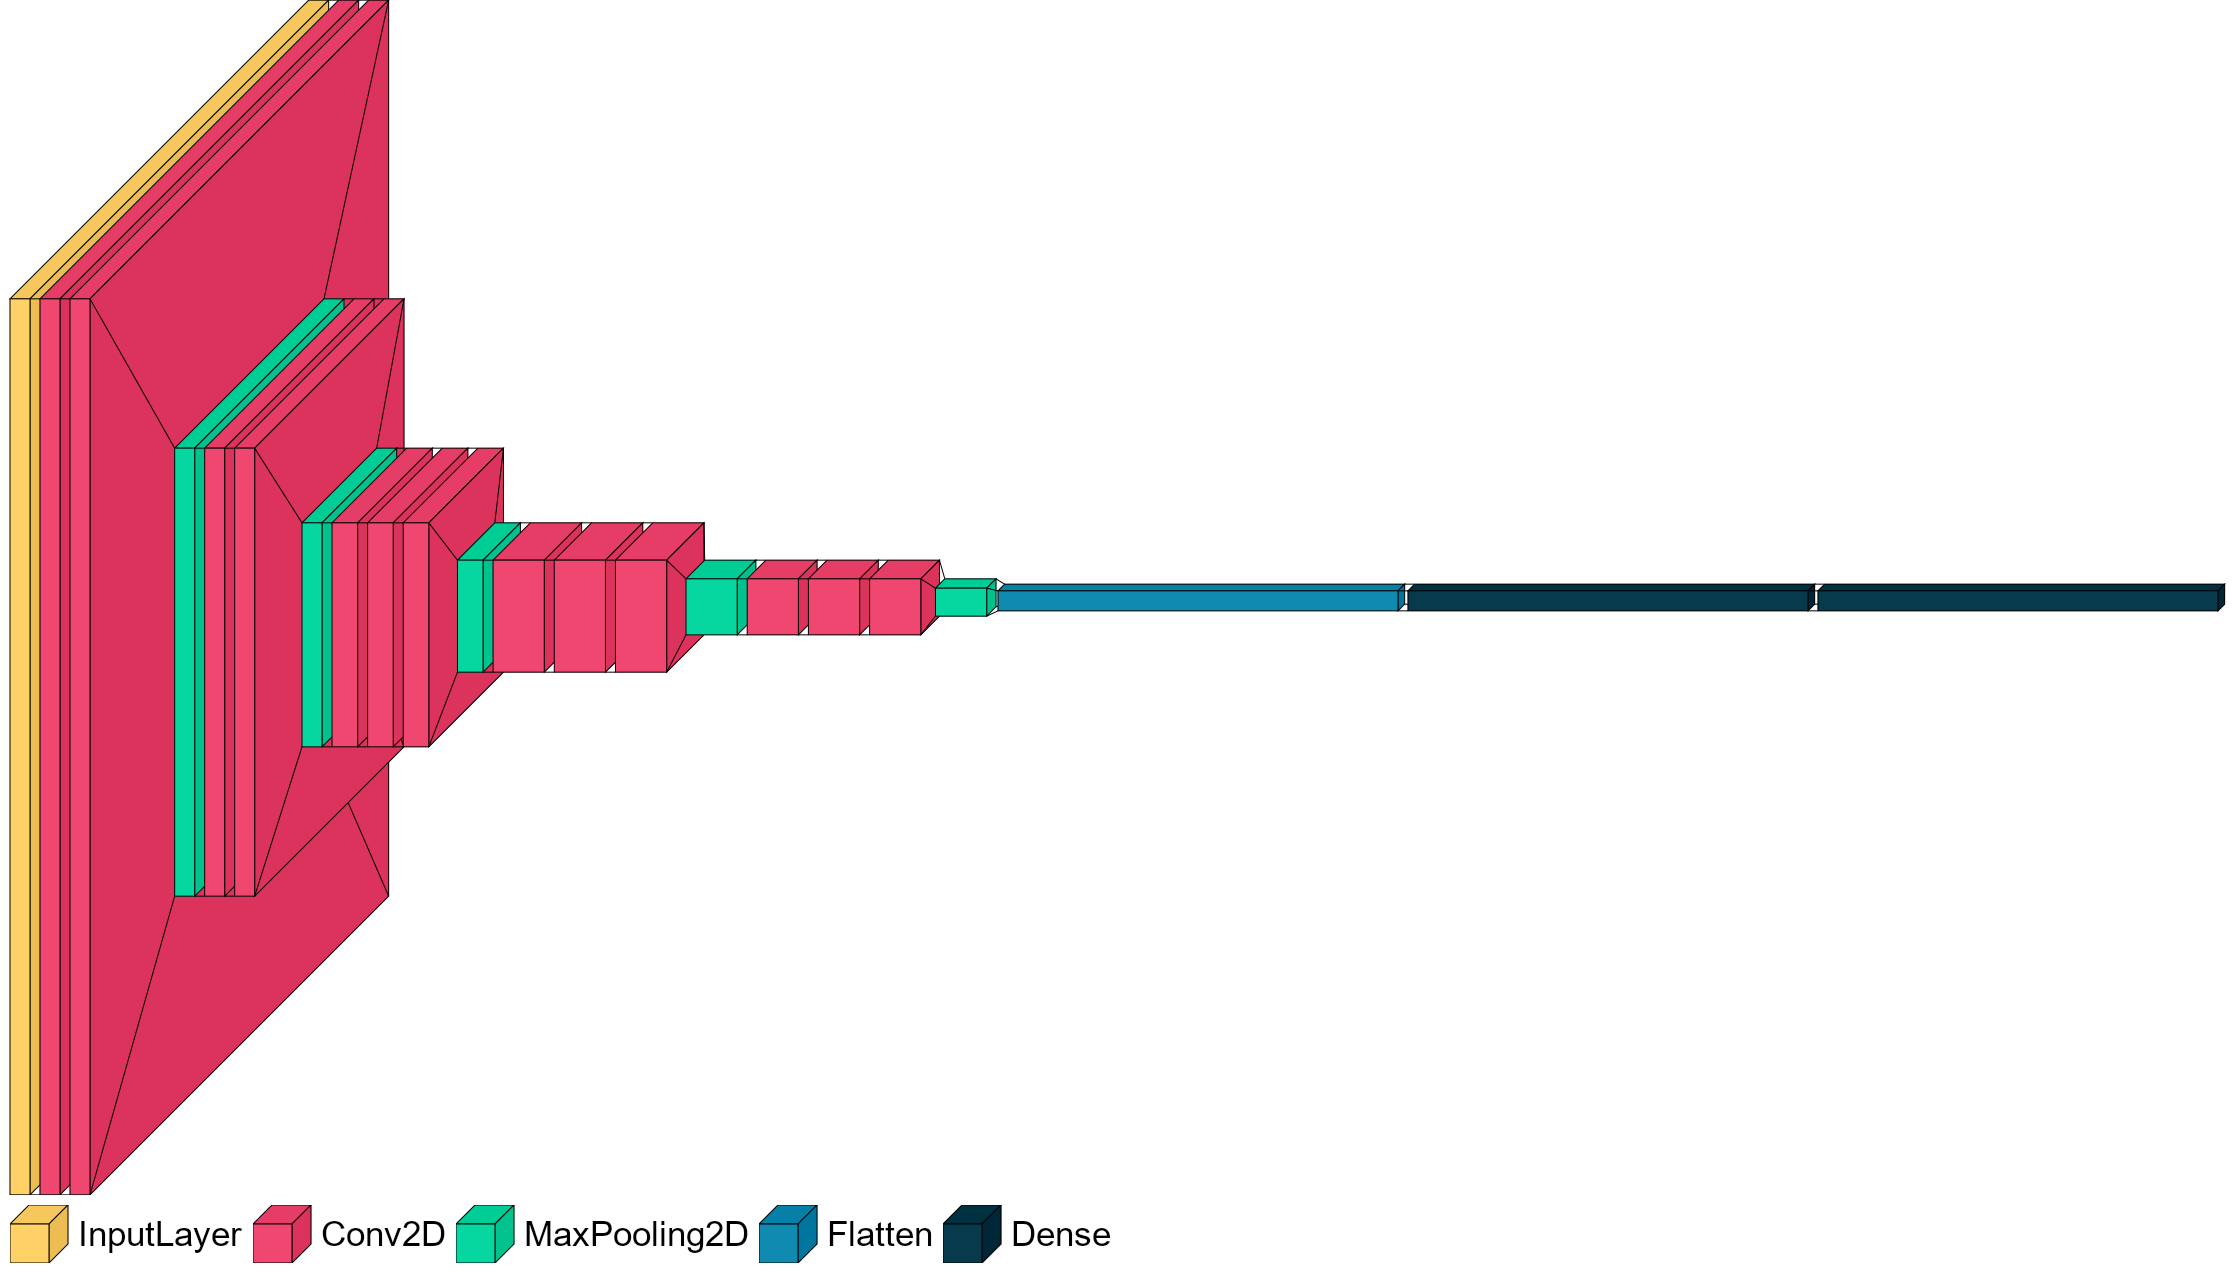

In [2]:
#Plot the modified VGG16
modifiedVGG16 = VGG16()
modifiedVGG16 = Model(inputs=modifiedVGG16.inputs, outputs=modifiedVGG16.layers[-2].output)

font = ImageFont.truetype("arial.ttf", 35)
visualkeras.layered_view(modifiedVGG16, legend=True, font=font,to_file='modifiedVGG16.png')